In [1]:
import os
import json
import glob
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import csv

In [13]:
# Set path to MRIQC outputs 
mriqc_path = '../../derivatives/mriqc/sub-*/ses-*/*/'

def get_mriqc_summary(mriqc_path, image_type, metrics_to_plot):
    json_files = glob.glob(os.path.join(mriqc_path, f'*{image_type}*.json'))
    all_metrics = defaultdict(list)
    for jfile in json_files:
        with open(jfile, 'r') as f:
            data = json.load(f)
            for key, value in data.items():
                if key in metrics_to_plot and isinstance(value, (float, int)):
                    all_metrics[key].append(value)
    return all_metrics

    
def plot_summary_IQMs(mriqc_path, image_type, metrics_to_plot):
    summary = get_mriqc_summary(mriqc_path, image_type, metrics_to_plot)
    # Setting up the figure and axes
    num_metrics = len(metrics_to_plot)
    rows = (num_metrics + 1) // 3
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5*rows))

    for idx, metric in enumerate(metrics_to_plot):
        ax = axs[idx // 3, idx % 3]
        values = summary[metric]
        ax.hist(values, bins=30, alpha=0.75)
        ax.set_xlabel(metric)
        ax.set_ylabel('Number of scans')
        ax.grid(True)

    # Remove any unused subplots (if an odd number of metrics)
    if num_metrics % 3 != 0:
        axs[-1, -1].axis('off')

    # Add a big title to the entire figure
    fig.suptitle(image_type, fontsize=20, y=0.92)
    if image_type == 'task':
        fig.suptitle('BOLD fMRI', fontsize=20, y=0.92)
    # Adjust the spacing between the subplots
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()
    plt.close()

def get_summary_stats(mriqc_path, image_type, metrics_to_plot):
    summary = get_mriqc_summary(mriqc_path, image_type, metrics_to_plot)
    for metric in metrics_to_plot:
        values = summary[metric]
        print(f'{metric}: {np.mean(values):.2f} +/- {np.std(values):.2f}')
        print(f'{metric}: {np.min(values):.2f} - {np.max(values):.2f}')

def get_motion_exclusions(mriqc_path, image_type):
    json_files = glob.glob(os.path.join(mriqc_path, f'*{image_type}*.json'))
    motion_exclusions = []
    for jfile in json_files:
        with open(jfile, 'r') as f:
            data = json.load(f)
            if data['fd_mean'] > 0.5:
                motion_exclusions.append(jfile)
            if data['dvars_std'] > 1.2:
                motion_exclusions.append(jfile)
    motion_exclusions = list(set(motion_exclusions))
    print(f'Task: {image_type}')
    print(f'Number of motion exclusions: {len(motion_exclusions)}')
    return motion_exclusions

## T1w anatomical MRIQC IQMs

Signal-to-noise ratio (SNR): Relative measure of background noise \
Contrast-to-noise ratio (CNR): Measure of contrast between white and gray matter (Magnotta & Friedman, 2006) \
Foreground-background energy ratio (FBER): Average value of energy within the head compared to regions outside of the head (Shehzad et al., 2015) Larger values are better. \
Entropy focus criterion (EFC): Proxy for ghosting or blurriness caused by head motion (Atkinson et al., 1997) Smaller values are better. \
Artifact detection (QI_1): Detects artifacts from motion, blurring or ghosting (Mortamet et al., 2009) Smaller values are better. \
Gray matter signal (summary_gm_mean): Average signal of gray matter


qi_1: 0.00 +/- 0.00
qi_1: 0.00 - 0.00
cnr: 3.37 +/- 0.25
cnr: 2.67 - 4.01
efc: 0.51 +/- 0.03
efc: 0.45 - 0.60
fber: 4127.96 +/- 1892.86
fber: -1.00 - 12216.99
summary_gm_mean: 666.88 +/- 13.60
summary_gm_mean: 635.55 - 700.43
snr_total: 8.89 +/- 0.70
snr_total: 7.06 - 10.92


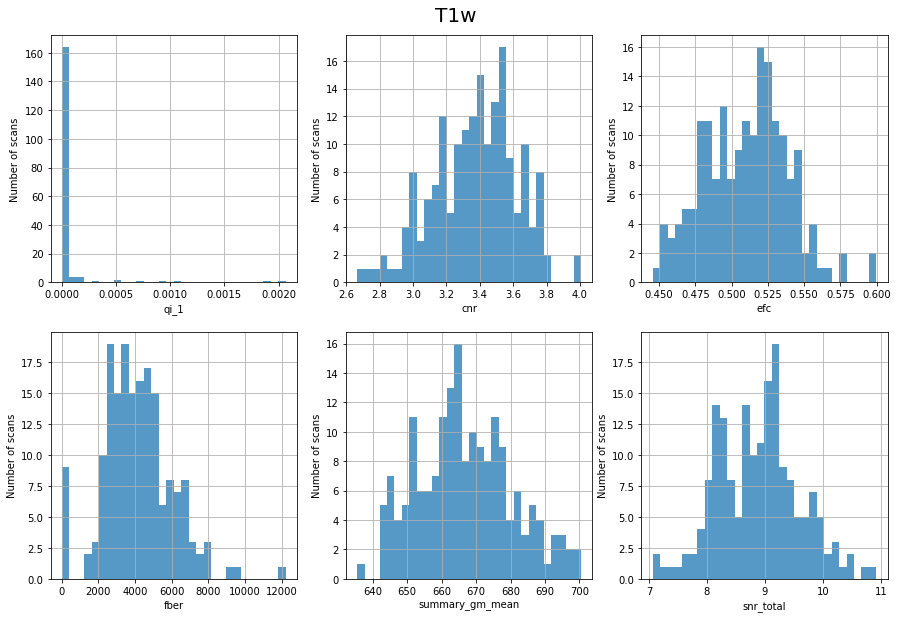

In [3]:
metrics_to_plot = ['qi_1', 'cnr', 'efc', 'fber', 'summary_gm_mean', 'snr_total']
get_summary_stats(mriqc_path, 'T1w', metrics_to_plot)
plot_summary_IQMs(mriqc_path, 'T1w', metrics_to_plot)


## Task BOLD MRIQC IQMs

Ghost to Signal Ratio (gsr_x, gsr_y): Measure of signal intensity in areas along encoding direction x and y compared to signal intensity inside the brain (Giannelli et al., 2010) \
DVARS (dvars_nstd):	Measure of signal changes from volume to volume. Smaller values are better. \
Framewise Displacement (fd_mean): Measure of motion throughout scan \
Temporal SNR (tsnr): Relative measure of background noise across time course \
Signal-to-noise Ratio (snr): Relative measure of background noise 

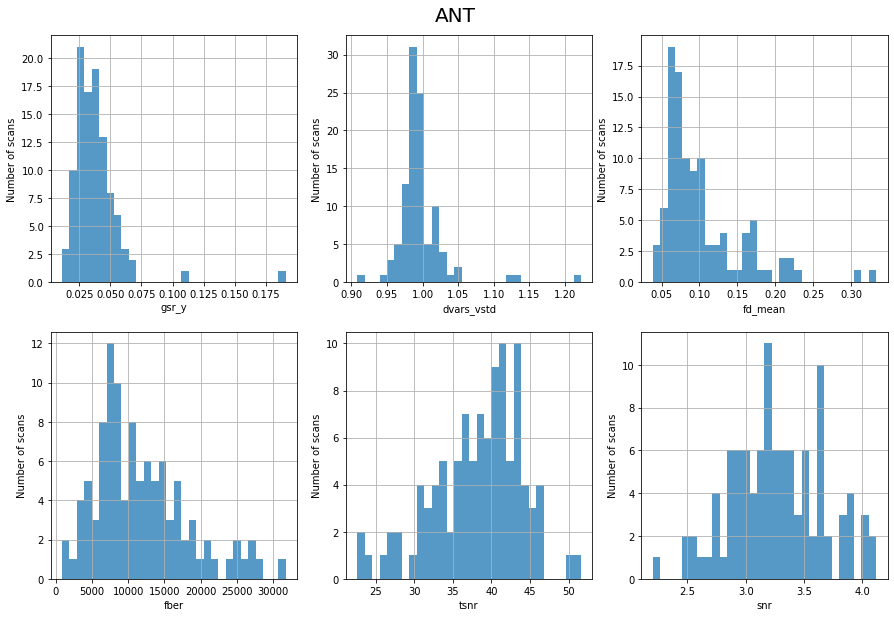

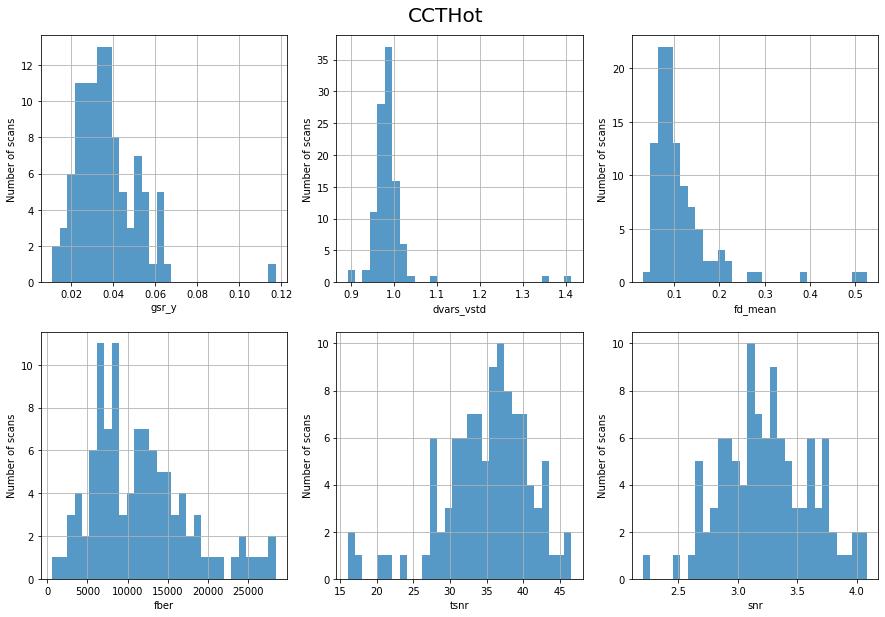

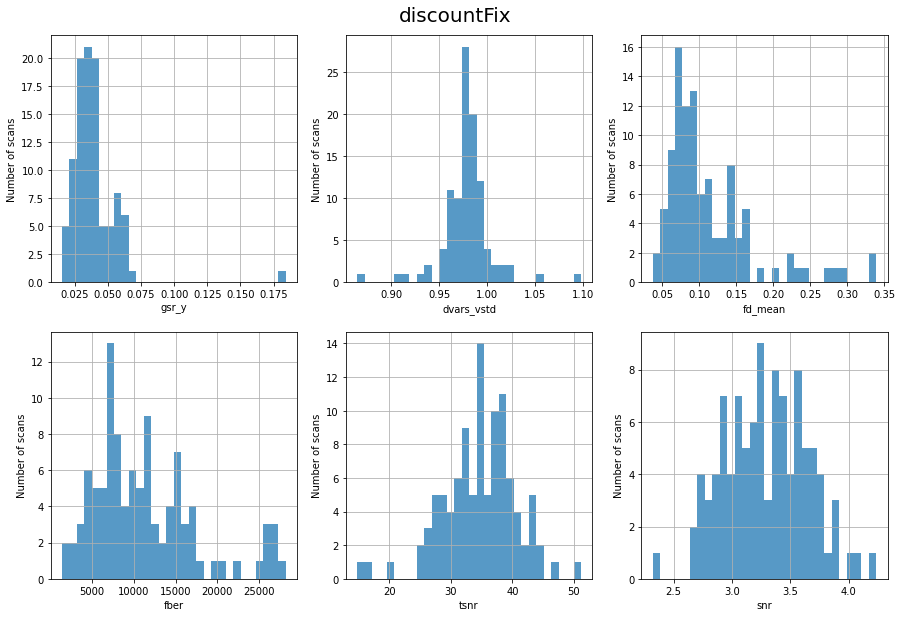

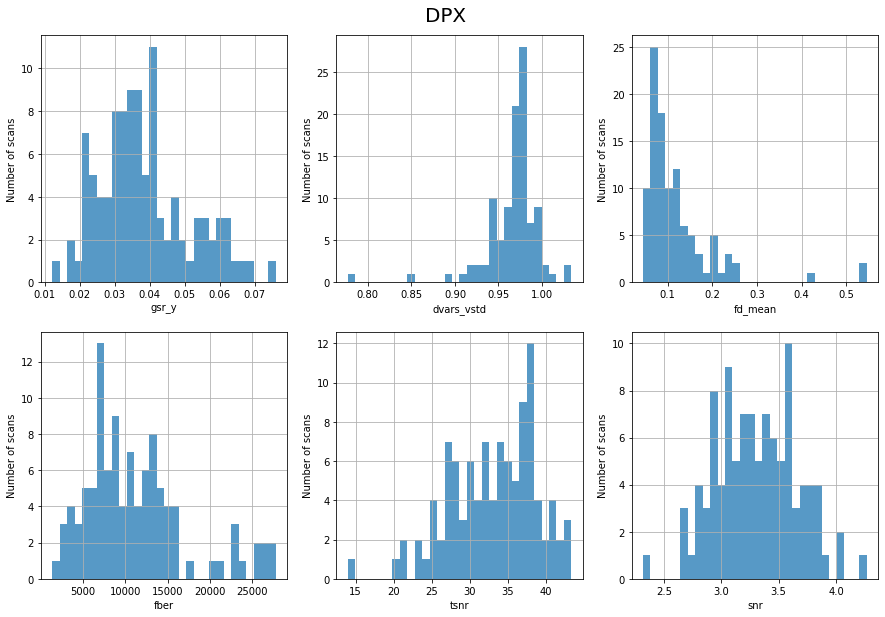

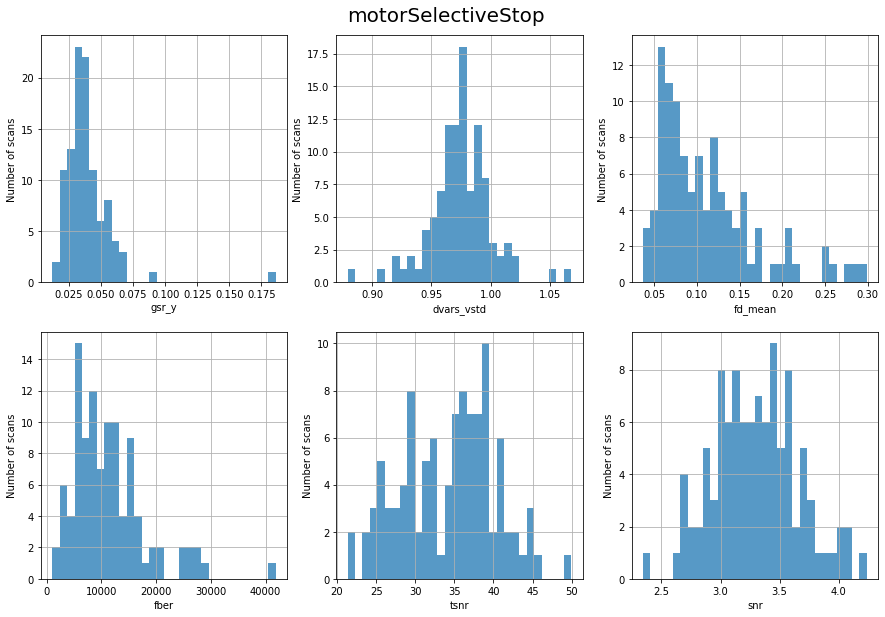

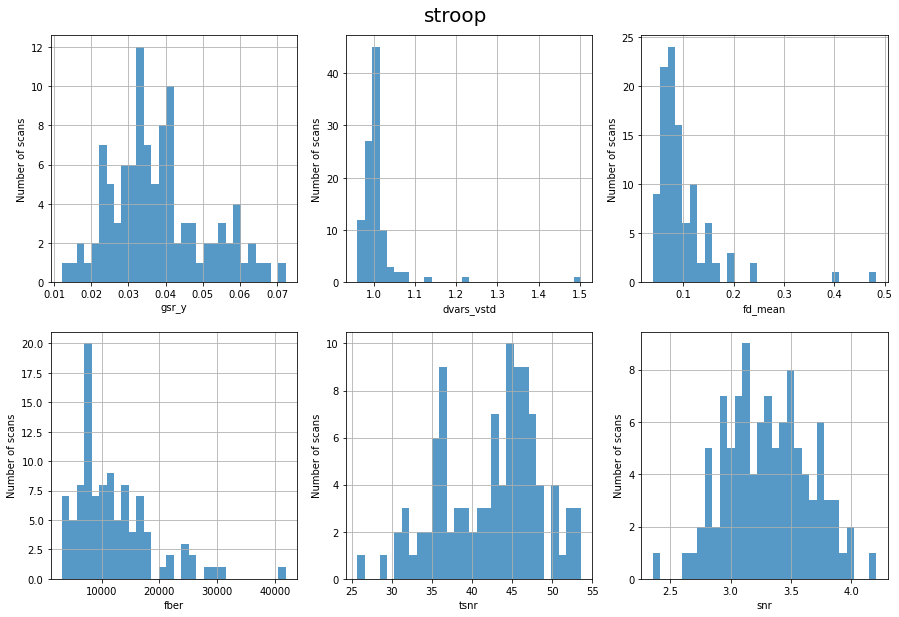

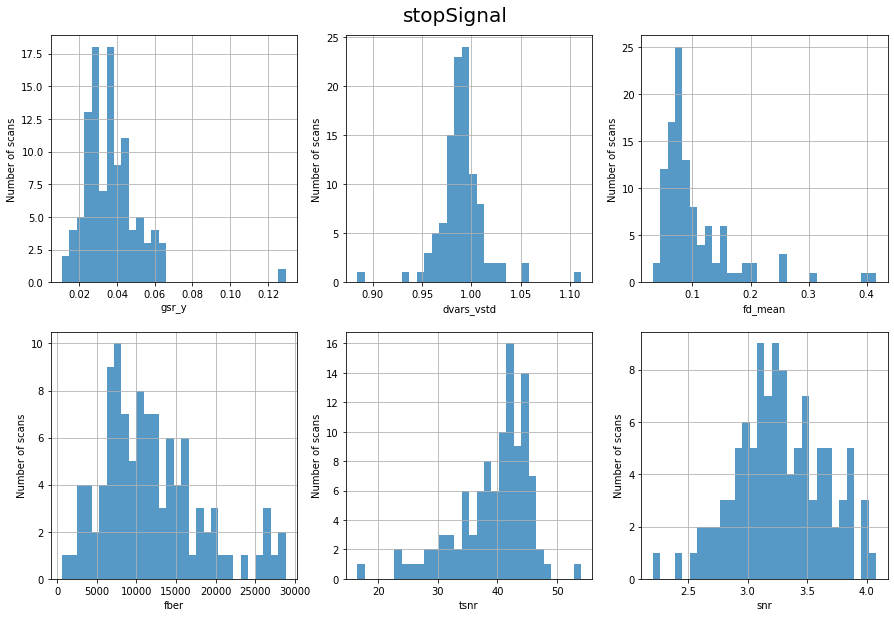

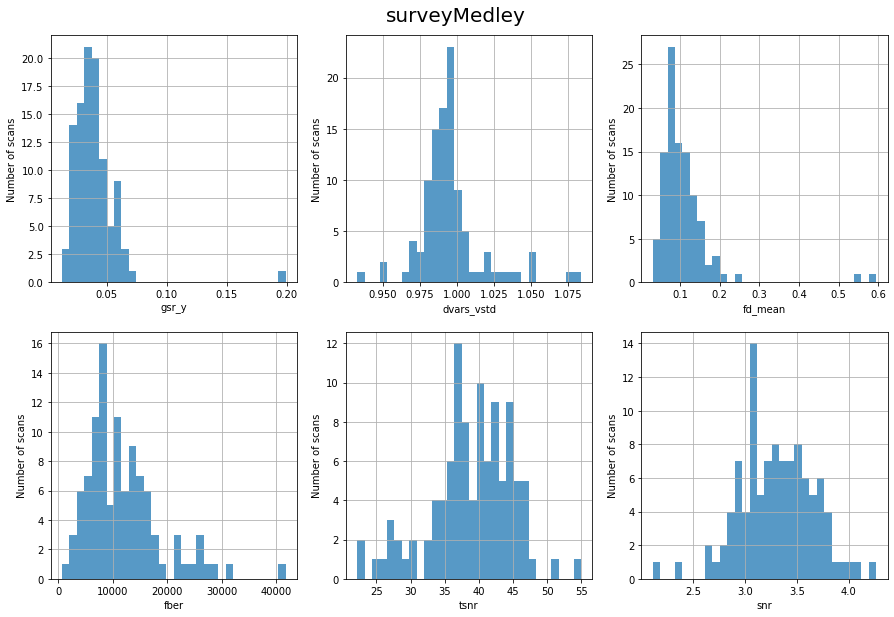

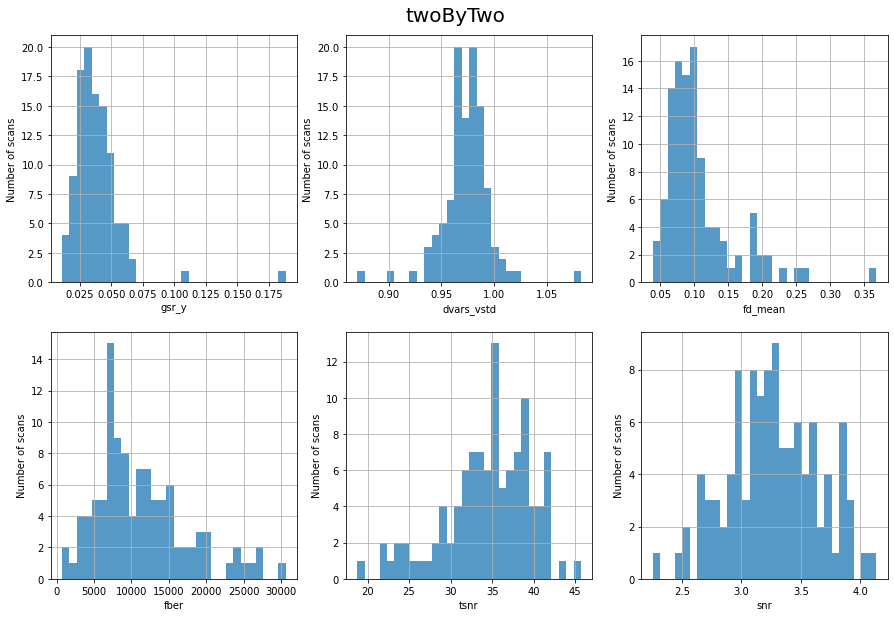

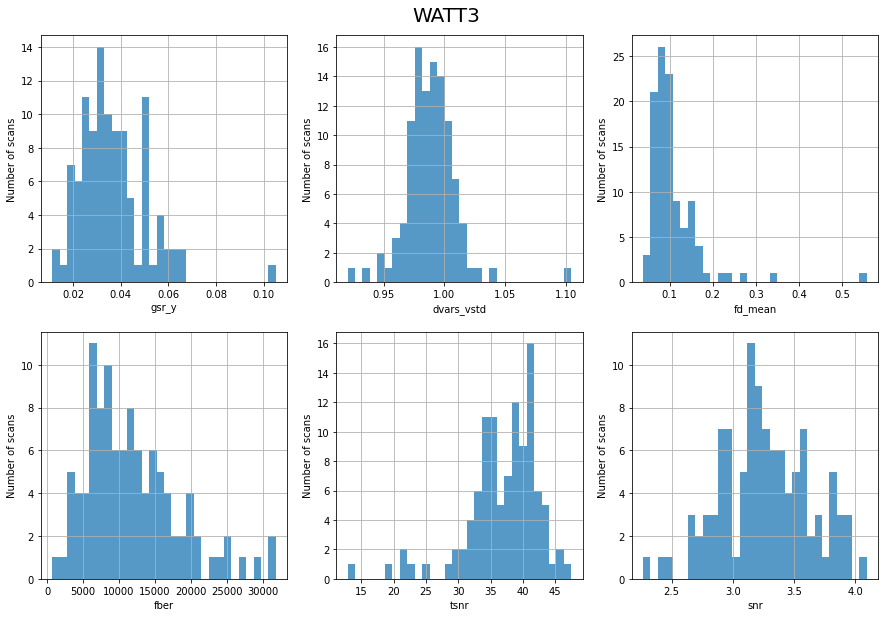

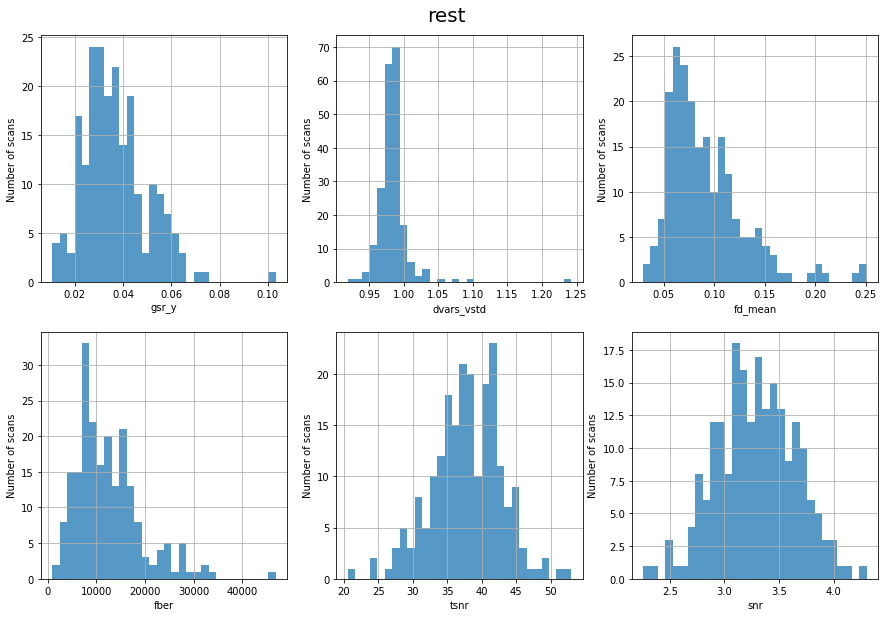

In [9]:
tasks = ['ANT', 'CCTHot', 'discountFix', 'DPX', 'motorSelectiveStop', 'stroop', 'stopSignal', 'surveyMedley', 'twoByTwo', 'WATT3', 'rest']
metrics_to_plot = ['gsr_y', 'dvars_vstd', 'fd_mean', 'fber', 'tsnr', 'snr']
for task in tasks:
    plot_summary_IQMs(mriqc_path, task, metrics_to_plot)

### Motion exclusions

In [14]:
tasks = ['ANT', 'CCTHot', 'discountFix', 'DPX', 'motorSelectiveStop', 'stroop', 'stopSignal', 'surveyMedley', 'twoByTwo', 'WATT3', 'rest']
for task in tasks:
    motion_exclusions = get_motion_exclusions(mriqc_path, task)

Task: ANT
Number of motion exclusions: 1
Task: CCTHot
Number of motion exclusions: 2
Task: discountFix
Number of motion exclusions: 0
Task: DPX
Number of motion exclusions: 2
Task: motorSelectiveStop
Number of motion exclusions: 0
Task: stroop
Number of motion exclusions: 1
Task: stopSignal
Number of motion exclusions: 0
Task: surveyMedley
Number of motion exclusions: 2
Task: twoByTwo
Number of motion exclusions: 0
Task: WATT3
Number of motion exclusions: 1
Task: rest
Number of motion exclusions: 0


### Compare across BOLD IQMs

In [3]:
tasks = ['ANT', 'CCTHot', 'discountFix', 'DPX', 'motorSelectiveStop', 'stroop', 'stopSignal', 'surveyMedley', 'twoByTwo', 'WATT3', 'rest']
metrics_to_plot = ['gsr_y', 'dvars_vstd', 'fd_mean', 'fber', 'tsnr', 'snr']

all_metrics_accumulator = defaultdict(list)

for task in tasks:
    task_metrics_avg = {}
    summary = get_mriqc_summary(mriqc_path, task, metrics_to_plot)
    for metric, values in summary.items():
        task_metrics_avg[metric + '_mean'] = sum(values) / len(values)
    all_metrics_accumulator[task] = task_metrics_avg

with open('mriqc_summary.csv', 'w') as f:
    writer = csv.DictWriter(f, fieldnames=['task'] + list(all_metrics_accumulator['ANT'].keys()))
    writer.writeheader()
    for task, metrics in all_metrics_accumulator.items():
        metrics['task'] = task
        writer.writerow(metrics)

In [5]:
from collections import defaultdict
import math

data = all_metrics_accumulator

# Initialize defaultdicts to store results
averages = defaultdict(float)
squared_diffs = defaultdict(float)
ranges = defaultdict(lambda: {"min": float("inf"), "max": -float("inf")})
std_devs = defaultdict(float)

num_tasks = len(data)

# Calculate averages
for task, metrics in data.items():
    for metric, value in metrics.items():
        if metric != "task":
            averages[metric] += value

for metric, total in averages.items():
    averages[metric] = total / num_tasks

# Calculate squared differences for standard deviations
for task, metrics in data.items():
    for metric, value in metrics.items():
        if metric != "task":
            squared_diffs[metric] += (value - averages[metric]) ** 2

# Calculate standard deviations
for metric, value in squared_diffs.items():
    std_devs[metric] = math.sqrt(value / num_tasks)

# Calculate ranges
for task, metrics in data.items():
    for metric, value in metrics.items():
        if metric != "task":
            ranges[metric]["min"] = min(ranges[metric]["min"], value)
            ranges[metric]["max"] = max(ranges[metric]["max"], value)

# List of metrics in the desired order
metrics_order = ["gsr_y_mean", "dvars_vstd_mean", "fd_mean_mean", "fber_mean", "tsnr_mean", "snr_mean"]

# Construct the formatted result string
result = []
for metric in metrics_order:
    formatted_str = f"{metric} (M = {averages[metric]:.3f}, SD = {std_devs[metric]:.3f}, range = {ranges[metric]['min']:.3f} - {ranges[metric]['max']:.3f})"
    result.append(formatted_str)

print(", ".join(result))


gsr_y_mean (M = 0.038, SD = 0.001, range = 0.037 - 0.040), dvars_vstd_mean (M = 0.986, SD = 0.012, range = 0.967 - 1.010), fd_mean_mean (M = 0.108, SD = 0.008, range = 0.092 - 0.120), fber_mean (M = 11672.360, SD = 379.258, range = 11149.039 - 12441.484), tsnr_mean (M = 36.842, SD = 2.646, range = 33.108 - 42.351), snr_mean (M = 3.281, SD = 0.020, range = 3.247 - 3.310)


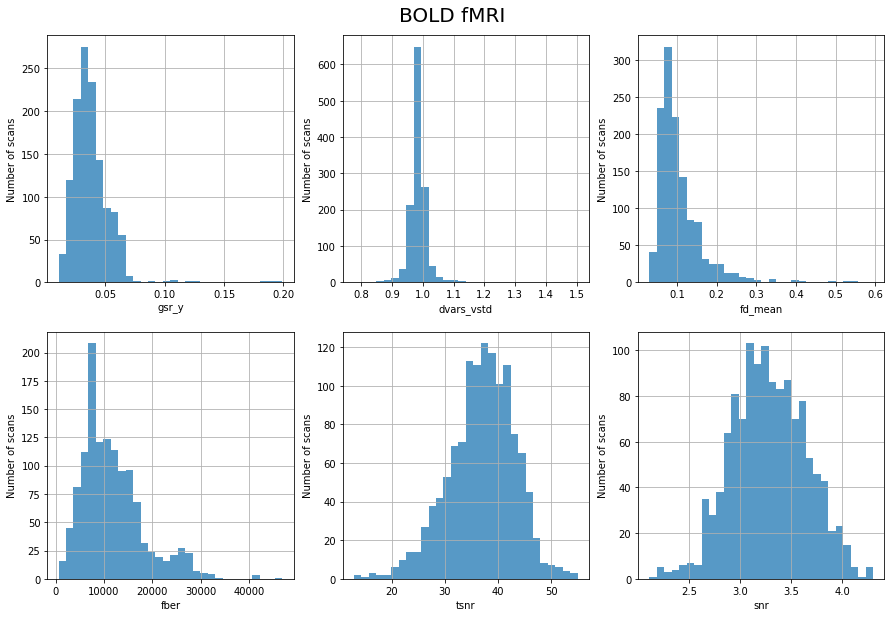

In [11]:
plot_summary_IQMs(mriqc_path, 'task', metrics_to_plot)